_Chowdhury Walid Tahabee_

APAN5105 - Python for Data Analysis

__Banking Assignment__

_04-03-2021_

## Assignment 2 - please answer the questions as thoroughly as possible, and provide detailed interpretation whenever possible

In [623]:
import pandas as pd
from pandas import Series
df=pd.read_csv("banklist.csv")
df.head()
#print(len(df))

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


## Question 1 (20 points)

Look at the data set: First, make sure there are no missing values in
any of the categorical columns.If there are, replace them with
a 'M' value. Then, consider that Acquiring Institution column is the institution that holds various banks.
__What are the top 4 acquiring institutions?__

In [624]:
df['Bank Name'].isnull().value_counts()

False    555
Name: Bank Name, dtype: int64

In [625]:
df['City'].isnull().value_counts()

False    555
Name: City, dtype: int64

In [626]:
df['ST'].isnull().value_counts()

False    555
Name: ST, dtype: int64

In [627]:
df['Acquiring Institution'].isnull().value_counts()

False    555
Name: Acquiring Institution, dtype: int64

__Thus, no missing values in categorical columns__

In [628]:
df['Acquiring Institution'].value_counts()

No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
                                       ..
Hillcrest Bank, N.A.                    1
Central Bank & Trust                    1
The National Bank and Trust Company     1
Landmark Bank, National Association     1
The Pecos County State Bank             1
Name: Acquiring Institution, Length: 290, dtype: int64

__Thus, top 4 acquiring institutions are:__

__1. State Bank and Trust Company__

__2. First-Citizens Bank & Trust Company__

__3. Ameris Bank__

__4. U.S. Bank N.A.__

How many city names start with the letter 'A' and how many don't? Use the str vectorized series attribute

In [630]:
cities = pd.Series(df['City'])
cities_A = cities.str.startswith('A')
cities_A_value_counts = cities_A.value_counts()

print(str(cities_A_value_counts[1]) + " city names start with the letter A")
print(str(cities_A_value_counts[0]) + " city names do not start with the letter A")

34 city names start with the letter A
521 city names do not start with the letter A


What are the cities whose names consist of 2 words and how many are there?

In [631]:
df[df['City'].str.split().apply(len) == 2]['City'].value_counts()

Las Vegas            4
Los Angeles          4
New York             2
St. Louis            2
San Diego            2
                    ..
Greenwood Village    1
Cave Junction        1
Palm Beach           1
Peachtree City       1
Port Orange          1
Name: City, Length: 108, dtype: int64

In [632]:
df['City'].str.split().apply(len).value_counts()

1    417
2    130
3      8
Name: City, dtype: int64

__108 distinct cities whose names consist of 2 words, with total 130 records in the banklist.csv dataset (because some cities have multiple records)__

## Question 2 (50 points)

Use various apply and group by methods studied in class to obtain the city for each state corresponding to the smallest number of certificates (CERT column). Then, display only the city, state combinations along with the number of certificates (data frame with 3 columns) for which the Acquiring Institution contains 3 words (for this exercise, you can count symbols like & and others as words for each Acquiring Institution)

In [637]:
mincert_by_st = df.groupby('ST').min().sort_values('CERT')
mincert_by_st['inst_str_count'] = mincert_by_st['Acquiring Institution'].str.split().apply(len) #constructing a column for word count in acquiring instution
mincert_by_st[mincert_by_st['inst_str_count'] == 3][['City', 'CERT']] #subsetting acquiring instituions with 3 words

,City,CERT
ST,,
WA,Arlington,513
MO,Butler,1056
UT,Cottonwood Heights,1249
TN,Alamo,1690
MN,Andover,1909
CO,Castle Rock,2994
MD,Baltimore,4862
WI,Blanchardville,5287
NE,Lincoln,5431


## Question 3 (30 points)

Finally, let us obtain a distribution of CERT column across all records. Then, let us subset the original data frame to only consider records for which CERT is smaller than 10th percentile of the total. Then, for these records, use pivot table method to obtain the min, max, and average CERT for each ST combination for which the number of records is more than 1. We will have index for state, and then 4 columns: ST,min_CERT, max_CERT, mean_CERT for CERT (make sure you do not have a multi-level data frame! Finally, display a bar plot for the first 3 states in the resulting data frame: each of the 3 states will be on x axis, and the corresponding 3 summary statistics will be the 3 bars - stacked bar plot.

<AxesSubplot:xlabel='ST'>

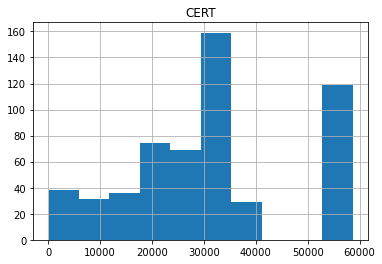

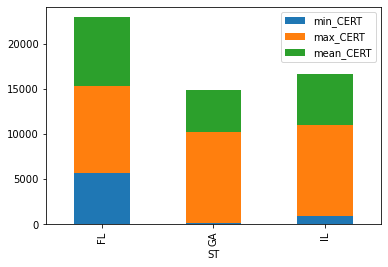

In [636]:
df.hist()
CERT_10 = df['CERT'].quantile(0.1) #10th percentile of CERT
df_subset = df[df['CERT'] < CERT_10] #subsetting values below 10th percentile of CERT
df_subset_2 = df_subset[
    df_subset.groupby('ST')['CERT'].transform('size') > 1] #subsetting values for which number of ST records > 1
#df_subset_2.value_counts('ST') #Remove '#' to check that df only includes states with multiple records
pivot = df_subset_2.pivot_table('CERT', index = ['ST'], aggfunc = ['min','max','mean'])
pivot.columns = pd.MultiIndex.from_tuples([('CERT', 'min_CERT'), ('CERT', 'max_CERT'), ('CERT','mean_CERT')])
pivot.columns = pivot.columns.droplevel()
pivot[:3].plot.bar(stacked = True)